## Glass dataset

Here is a given dataset which is about seven different types of glass :
- 1 building_windows_float_processed 
- 2 building_windows_non_float_processed 
- 3 vehicle_windows_float_processed 
- 4 vehicle_windows_non_float_processed (none in this database) 
- 5 containers 
- 6 tableware 
- 7 headlamps

The nine features are :
- RI: refractive index 
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) 
- Mg: Magnesium 
- Al: Aluminum 
- Si: Silicon 
- K: Potassium 
- Ca: Calcium 
- Ba: Barium 
- Fe: Iron 

The study of classification of types of glass was motivated by criminological investigation.

### 1 - Loading librairies/data 

In [1]:
# Importing Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the data
glass = pd.read_csv('glass.data', header=None)

In [3]:
# give labels to the columns
glass.columns = ['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [4]:
# drop the Id number column
glass=glass.drop('Id number',axis=1)

In [5]:
glass.shape

(214, 10)

In [6]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
# Checking the first few rows:
glass.groupby('Type of glass').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type of glass,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


In [8]:
# Overall view of the data:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI               214 non-null float64
Na               214 non-null float64
Mg               214 non-null float64
Al               214 non-null float64
Si               214 non-null float64
K                214 non-null float64
Ca               214 non-null float64
Ba               214 non-null float64
Fe               214 non-null float64
Type of glass    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### 2 - Summarizing data

In [9]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


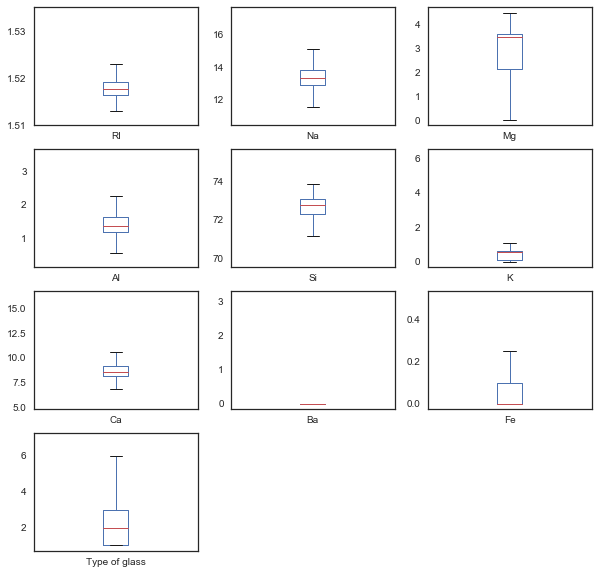

In [10]:
# box and whisker plots
glass.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(10,10))
plt.show()

The data is highly variable : the Si component has a mean higher than 70 while the Ba and the Fe components have a mean almost equal to zero.

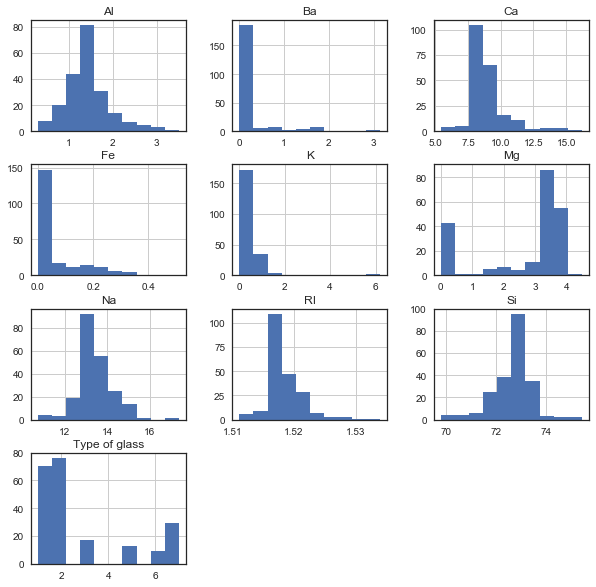

In [11]:
glass.hist(figsize=(10,10))
plt.show()

It looks like none of the input variables have a Gaussian distribution. And the types 1 and 2 constitutent more than 67% of the glass types.

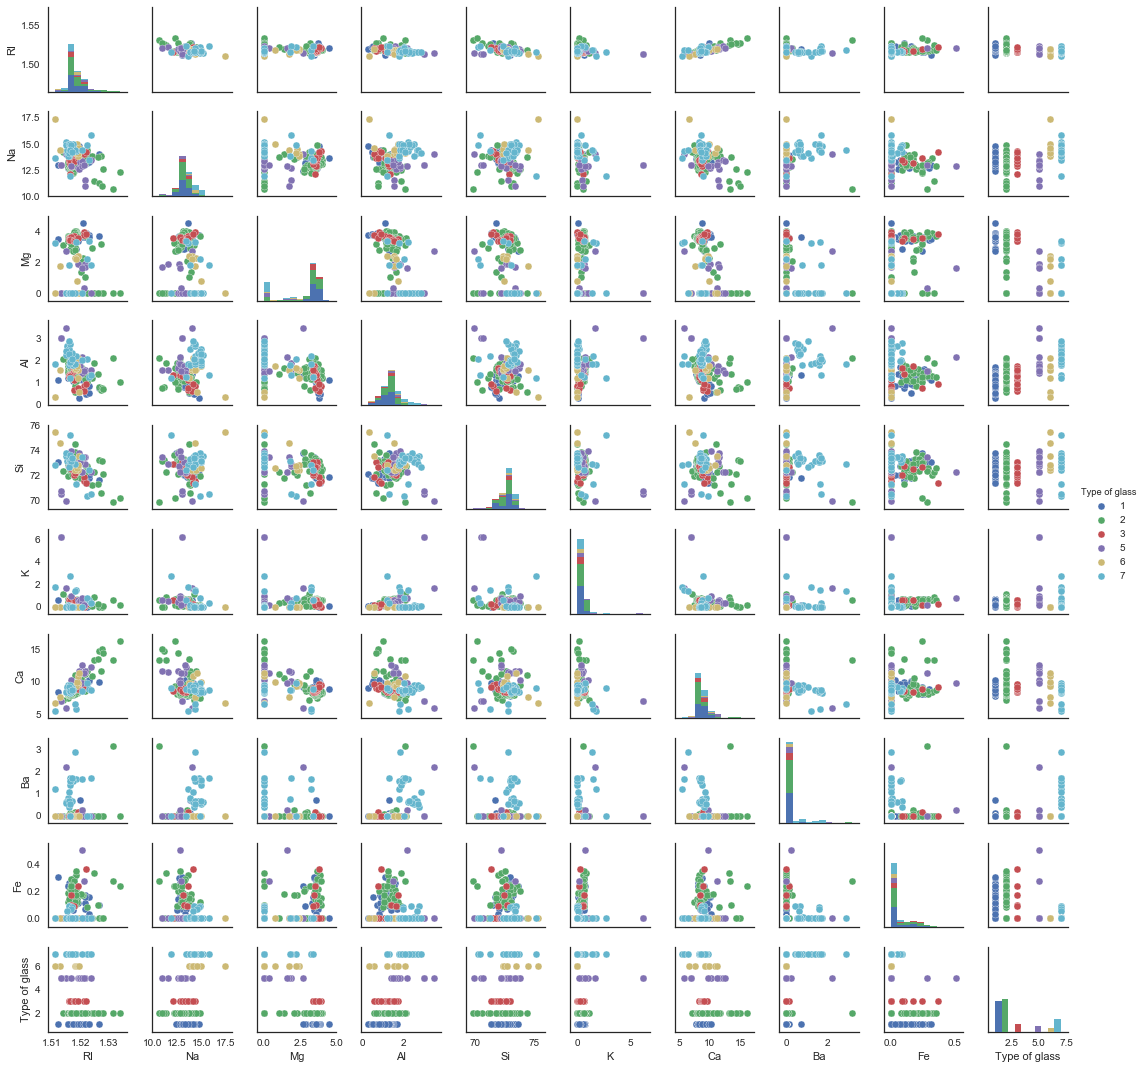

In [12]:
sns.pairplot(glass, hue='Type of glass',size=1.5)
plt.show()

In [13]:
corr_glass=glass.corr()
corr_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


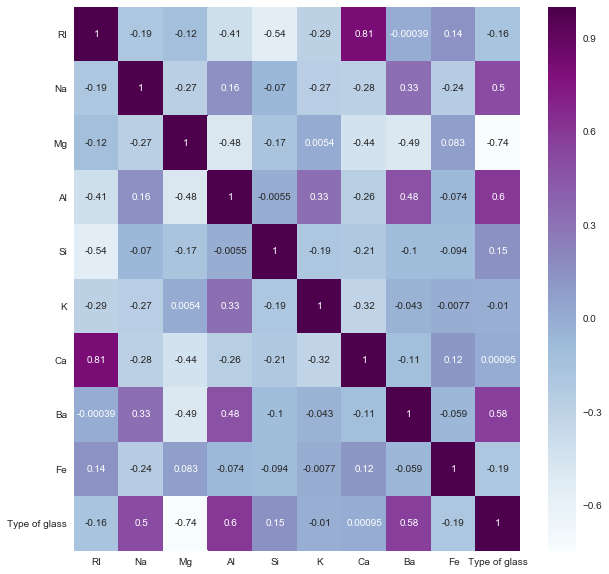

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_glass,cmap="BuPu",annot=True)

There seem to be a high correlation between RI and Ca components.

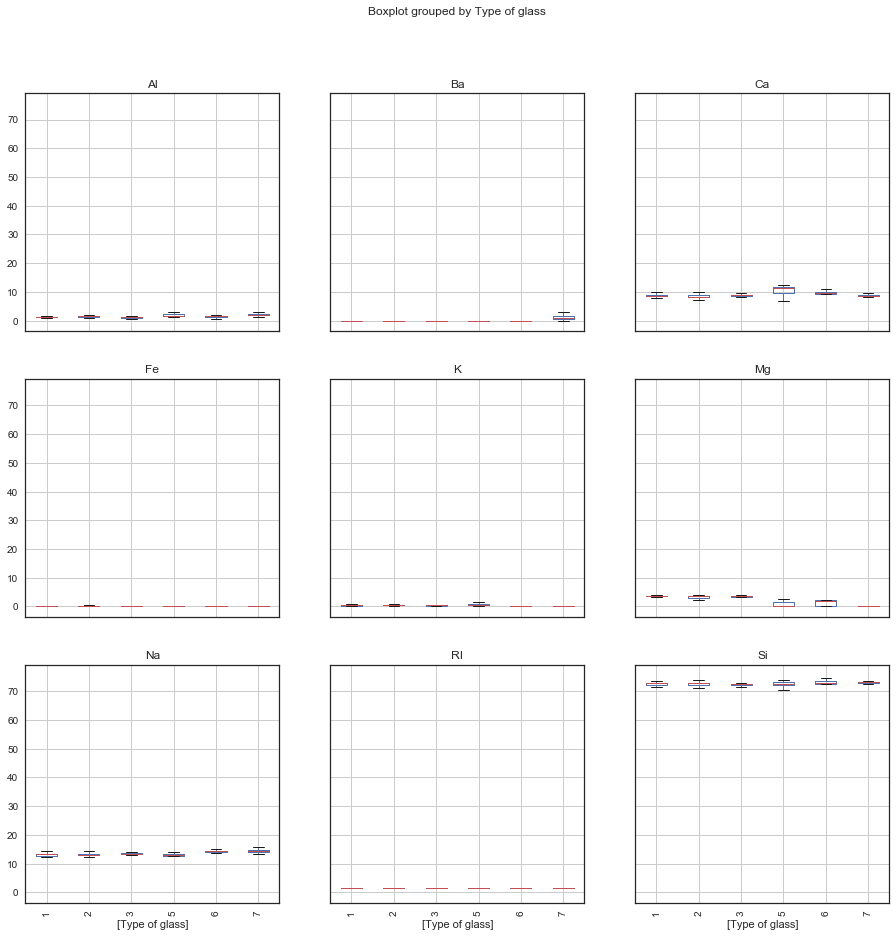

In [15]:
glass.boxplot(by="Type of glass", rot=90,figsize=(15, 15))
plt.show()

### 3 - Data preparation

In [16]:
glass.isnull().values.sum()

0

There is no missing values in the dataset so we can conclude the dataset is already clean.

In [17]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [18]:
X = glass.drop(['Type of glass'],axis=1)
y = glass['Type of glass']

# Split the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [19]:
print (X_train.shape, X_test.shape, y_train.shape, \
y_test.shape)

(149, 9) (65, 9) (149,) (65,)


In [20]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
X_train_std

array([[-0.68839515,  0.87666628, -1.81873437, ...,  0.15223482,
         1.96781467, -0.58478755],
       [-0.63022705,  1.15422867, -1.81873437, ...,  0.33787915,
         0.82591622, -0.58478755],
       [-1.79701056,  1.19043246, -0.62178795, ..., -0.94100405,
        -0.35990139, -0.58478755],
       ...,
       [-0.66102193, -0.08876813,  0.63706949, ..., -0.73473257,
        -0.35990139, -0.58478755],
       [-0.23673702, -0.49907775,  0.6577065 , ..., -0.38407104,
        -0.35990139,  0.5019095 ],
       [ 0.29019747,  0.57496803,  0.60955348, ..., -0.12279383,
        -0.11834595, -0.58478755]])

### 4 - KNN classifier

In [22]:
# Importing the model:
from sklearn.neighbors import KNeighborsClassifier

# Initiating the model:
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.66
Misclassified samples: 22


### 5 - Parameter tuning with cross validation

In [24]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
k_list= list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, k_list))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


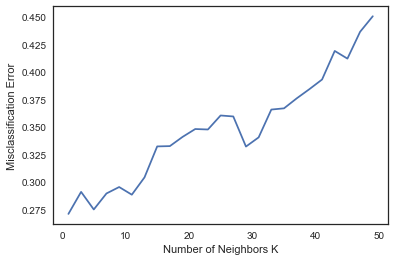

In [25]:
# changing to misclassification error
MSE = [1-x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### 6 - Applying diagnostics

For all the following classifiers we use the optimal number of neighbors which is 1.

#### The class of each of the K neighbors is multiplied by a weight proportional to the inverse of the distance from that point to the given test point

In [26]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance',p=2)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [27]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.69
Misclassified samples: 20


The accuracy slightly became higher than previously.

#### Let's change the distance metric for different applications to improve the accuracy of the algorithm.

In [28]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance',metric='manhattan')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [29]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.75
Misclassified samples: 16


In [30]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance',metric='chebyshev')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [31]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.65
Misclassified samples: 23


The metric which makes the accuracy the highest seems to be the 'manhattan' metric.

For the following measurements, we keep the the optimal number of neighbors which is 1, the weight 'distance' and the 'manhattan' metric.

#### Let's rescale the data with normalize function

In [32]:
nm = Normalizer()
nm.fit(X_train)
X_train_nm = nm.transform(X_train)
X_test_nm = nm.transform(X_test)

In [33]:
X_train_nm

array([[0.02031935, 0.18949338, 0.        , ..., 0.12302328, 0.0142053 ,
        0.        ],
       [0.02024023, 0.19180435, 0.        , ..., 0.12613438, 0.00720768,
        0.        ],
       [0.01981474, 0.18858834, 0.02278776, ..., 0.09940177, 0.        ,
        0.        ],
       ...,
       [0.02032046, 0.17877275, 0.04784248, ..., 0.10573591, 0.        ,
        0.        ],
       [0.02030715, 0.17395995, 0.04817352, ..., 0.11240489, 0.        ,
        0.00147197],
       [0.02058947, 0.18826255, 0.04784498, ..., 0.11900253, 0.00149092,
        0.        ]])

In [34]:
knn = KNeighborsClassifier(n_neighbors=1,weights='distance',metric='manhattan')
knn.fit(X_train_nm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [35]:
y_pred = knn.predict(X_test_nm)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.68
Misclassified samples: 21


#### Dimensionality reduction : PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=0.95)

In [38]:
principalComponents = pca.fit(X_train)

In [39]:
print(pca.explained_variance_ratio_)

[0.48712291 0.28249038 0.10276376 0.08389038]


In [40]:
print(pca.singular_values_)

[21.3900465  16.28899485  9.82454517  8.87663855]


In [41]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [42]:
knn = KNeighborsClassifier(n_neighbors=1,weights='distance',metric='manhattan')
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [43]:
y_pred = knn.predict(X_test_pca)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.65
Misclassified samples: 23


After applying and testing for these diagnostics, we choose the model performance with the standardized data, the weight 'distance',the number of neighbors equal to 1 and the metric 'manhattan'.

In [44]:
# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=1, weights='distance',metric='manhattan')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('The final Accuracy is %.2f' % accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

The final Accuracy is 0.75
[[21  2  2  0  0  0]
 [ 3 11  0  1  0  0]
 [ 2  2  5  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  1  0  5]]
             precision    recall  f1-score   support

          1       0.81      0.84      0.82        25
          2       0.61      0.73      0.67        15
          3       0.71      0.56      0.63         9
          5       0.71      1.00      0.83         5
          6       1.00      0.67      0.80         3
          7       1.00      0.62      0.77         8

avg / total       0.77      0.75      0.75        65



The accuracy has improved by about 4% compared to the KNN with the default parameters.